In [31]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import plotly.express as px  # For interactive plots
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced visualizations
import warnings  # To handle warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Ignore warnings for clean output
warnings.filterwarnings('ignore')

# ===================== Chunk 1: Load Dataset =====================
# Load dataset
file_path = 'Netflix_Movies_and_TV_Shows.csv'
df = pd.read_csv(file_path)

# Display first few rows of the dataset
display(df.head())

# Create a copy to avoid modifying the original dataset
df_copy = df.copy()


,Title,Type,Genre,Release Year,Rating,Duration,Country
0,Title 1,TV Show,Comedy,1955,PG,3 Seasons,Japan
1,Title 2,TV Show,Horror,2020,G,3 Seasons,India
2,Title 3,TV Show,Action,1966,TV-PG,140 min,United States
3,Title 4,Movie,Thriller,2011,PG-13,3 Seasons,Canada
4,Title 5,TV Show,Romance,1959,TV-14,172 min,India


In [32]:
# ===================== Chunk 2: Basic Information =====================
# Basic statistics and information
print("Dataset Shape:", df_copy.shape)  # Display the number of rows and columns
print("\nData Types and Non-null Counts:")
print(df_copy.info())
print("\nSummary Statistics:")
print(df_copy.describe())


Dataset Shape: (3000, 7)

Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         3000 non-null   object
 1   Type          3000 non-null   object
 2   Genre         3000 non-null   object
 3   Release Year  3000 non-null   int64 
 4   Rating        3000 non-null   object
 5   Duration      3000 non-null   object
 6   Country       3000 non-null   object
dtypes: int64(1), object(6)
memory usage: 164.2+ KB
None

Summary Statistics:
       Release Year
count   3000.000000
mean    1985.935333
std       21.220617
min     1950.000000
25%     1968.000000
50%     1986.000000
75%     2004.000000
max     2023.000000


In [33]:
# ===================== Chunk 3: Handling Missing Values =====================
# Checking for missing values
print("\nMissing Values in Each Column:")
print(df_copy.isna().sum())

# Visualizing missing values
fig = px.bar(x=df_copy.columns, y=df_copy.isnull().mean()*100, color_discrete_sequence=['red'],
             title='Percentage of Missing Values per Column')
fig.update_xaxes(title_text='Column Name')
fig.update_yaxes(title_text='Percentage')
fig.show()



Missing Values in Each Column:
Title           0
Type            0
Genre           0
Release Year    0
Rating          0
Duration        0
Country         0
dtype: int64


In [34]:
# ===================== Chunk 4: Data Cleaning =====================
# Renaming columns for consistency
df.rename(columns={"Release Year": "Release_Year"}, inplace=True)

# Checking for duplicate Titles
duplicates = df_copy.duplicated(subset=['Title']).sum()
print("\nNumber of Duplicate Titles:", duplicates)



Number of Duplicate Titles: 0


In [35]:
# ===================== Chunk 5: Data Visualization =====================
# Distribution of content ratings
rating_counts = df.groupby(['Rating']).size().reset_index(name='Counts')
piechart = px.pie(rating_counts, values='Counts', names='Rating', title='Distribution of Content Ratings on Netflix')
piechart.show()

# Trend of content production over the years
df1 = df[['Type', 'Release_Year']]
df1 = df1.groupby(['Release_Year', 'Type']).size().reset_index(name='Total_Count')
trend_graph = px.line(df1, x="Release_Year", y="Total_Count", color="Type", title="Trend of Content Produced on Netflix")
trend_graph.show()


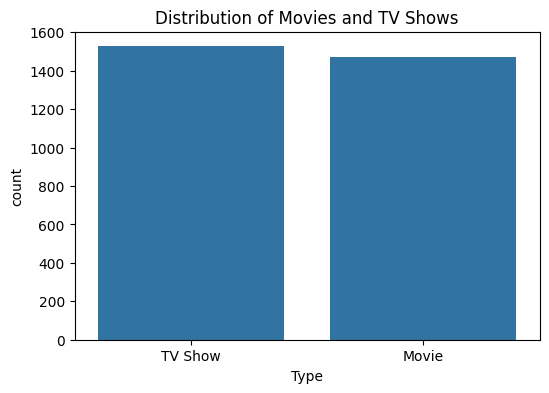

In [36]:
# ===================== Chunk 6: Advanced Analysis =====================
# Focusing on content released after 2000
df1 = df1[df1['Release_Year'] > 2000]
trend_graph = px.line(df1, x="Release_Year", y="Total_Count", color="Type", title="Netflix Content Production After 2000")
trend_graph.show()

# Content type distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Movies and TV Shows')
plt.show()


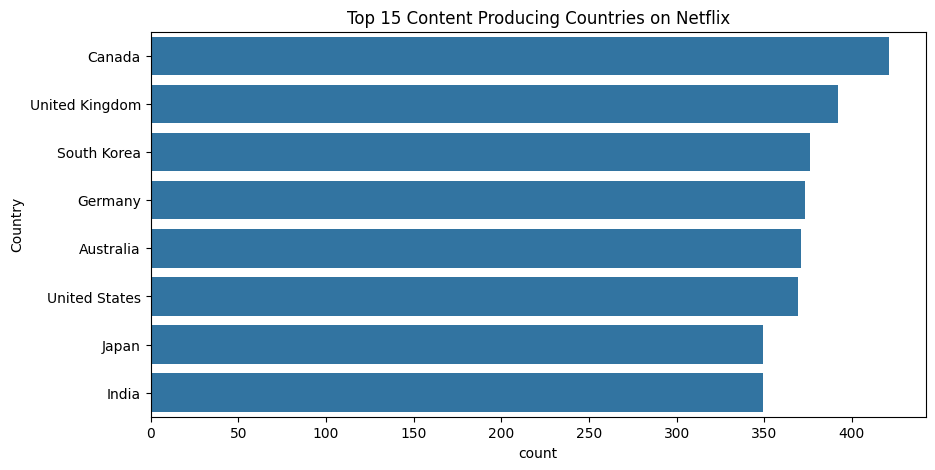

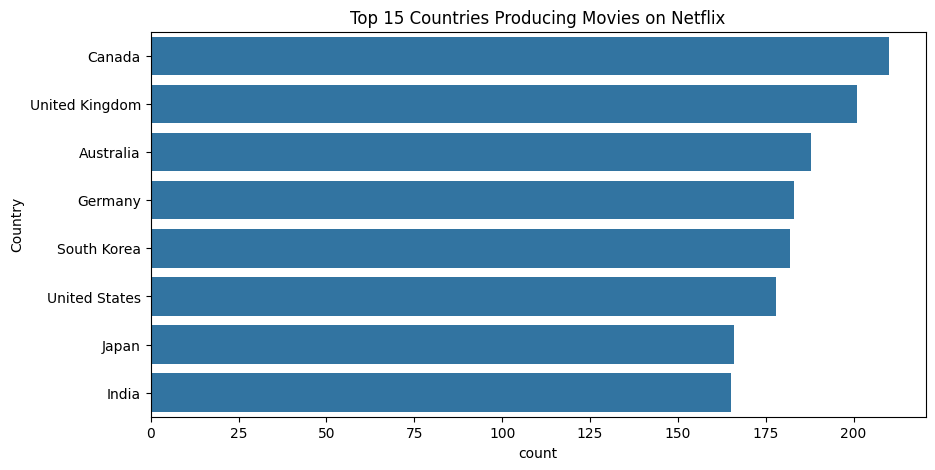

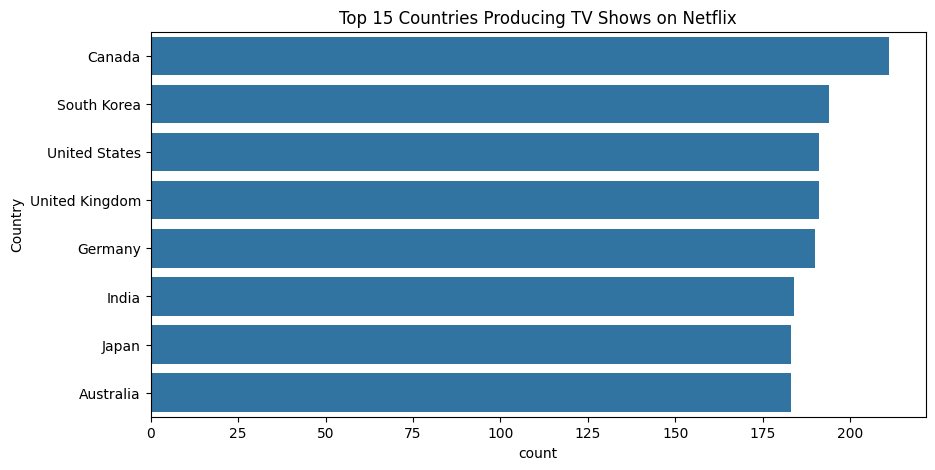

In [37]:
# ===================== Chunk 7: Country-Based Analysis =====================
# Top 15 countries producing content on Netflix
plt.figure(figsize=(10, 5))
sns.countplot(y='Country', order=df['Country'].value_counts().index[:15], data=df)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.show()

# Separating Movies and TV Shows for country analysis
movie_country = df[df['Type'] == 'Movie']
tv_show_country = df[df['Type'] == 'TV Show']

plt.figure(figsize=(10, 5))
sns.countplot(y='Country', order=movie_country['Country'].value_counts().index[:15], data=movie_country)
plt.title('Top 15 Countries Producing Movies on Netflix')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(y='Country', order=tv_show_country['Country'].value_counts().index[:15], data=tv_show_country)
plt.title('Top 15 Countries Producing TV Shows on Netflix')
plt.show()


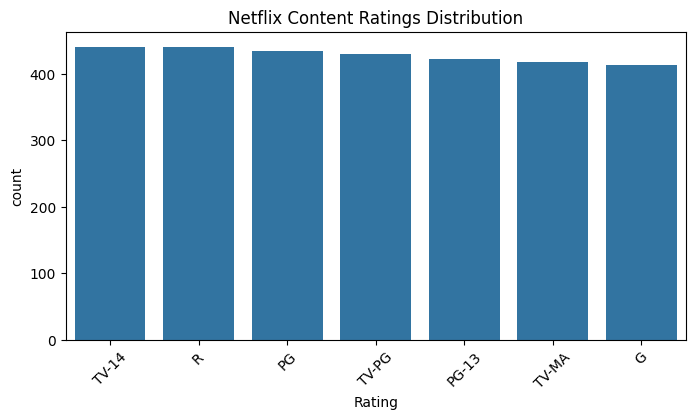

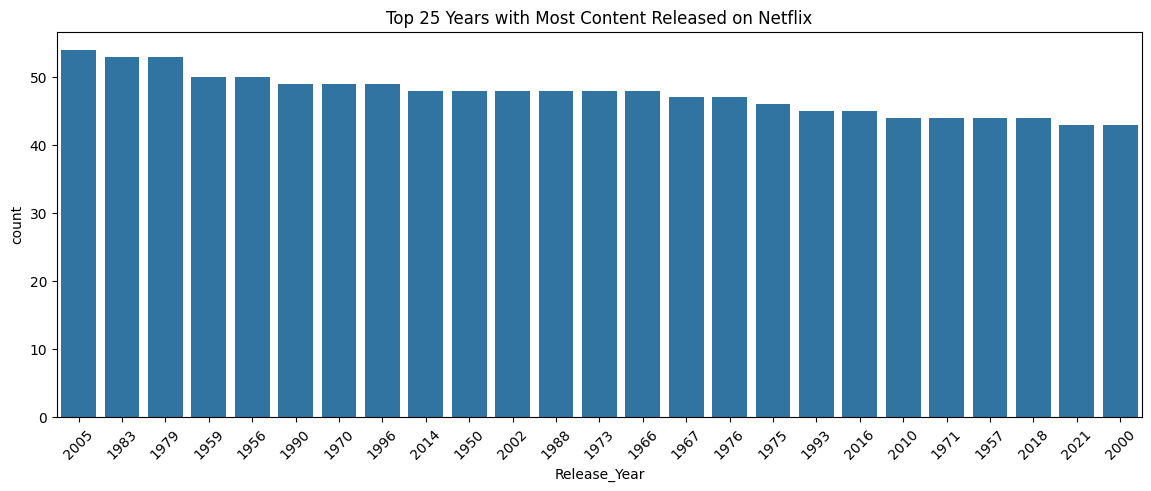

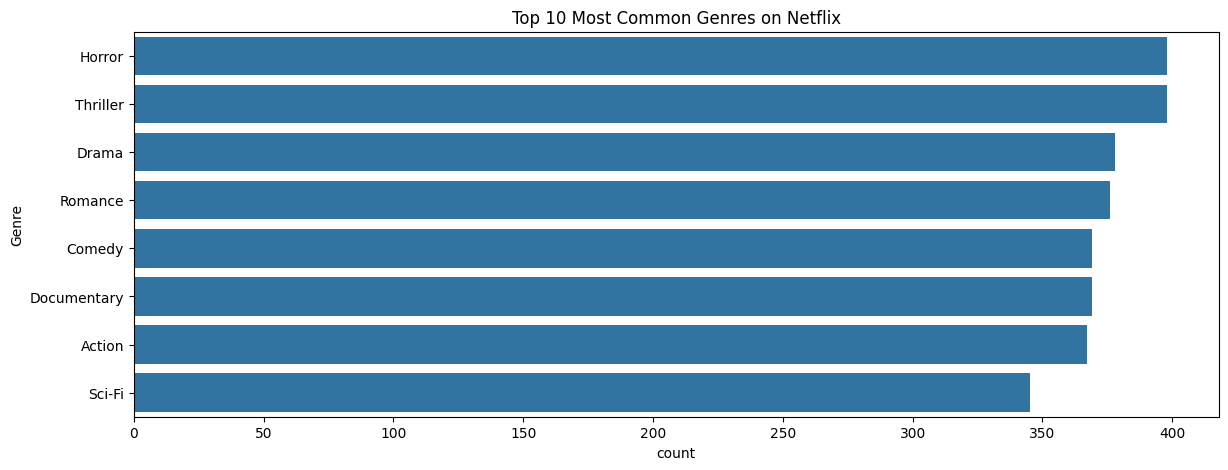

In [38]:
# ===================== Chunk 8: Ratings and Genre Analysis =====================
# Distribution of Ratings
plt.figure(figsize=(8, 4))
sns.countplot(x='Rating', order=df['Rating'].value_counts().index[:15], data=df)
plt.title('Netflix Content Ratings Distribution')
plt.xticks(rotation=45)
plt.show()

# Content release trends per year
plt.figure(figsize=(14, 5))
sns.countplot(x='Release_Year', order=df['Release_Year'].value_counts().index[:25], data=df)
plt.title('Top 25 Years with Most Content Released on Netflix')
plt.xticks(rotation=45)
plt.show()

# Top 10 genres on Netflix
plt.figure(figsize=(14, 5))
sns.countplot(y='Genre', order=df['Genre'].value_counts().index[:10], data=df)
plt.title('Top 10 Most Common Genres on Netflix')
plt.show()


In [41]:
print(df_ml['Type'].value_counts(normalize=True))  # Check ratio of Movies vs. TV Shows


Type
1    0.509
0    0.491
Name: proportion, dtype: float64


In [42]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)

# Predict
y_pred_log = logreg.predict(X_test)

# Evaluate Performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.5483333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.31      0.40       287
           1       0.55      0.77      0.64       313

    accuracy                           0.55       600
   macro avg       0.55      0.54      0.52       600
weighted avg       0.55      0.55      0.52       600



In [43]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate Performance
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.52      0.50       287
           1       0.52      0.49      0.50       313

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600

